In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset/Groceries_dataset.csv")

In [3]:
df.head(15)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [58]:
df.shape

(38765, 3)

In [59]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
frozen chicken              5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

In [60]:
len(df['itemDescription'].unique())

167

In [232]:
df["Year"] = df["Date"].str.split("-").str[-1]
df["Month"] = df["Date"].str.split("-").str[1]
df.head(15)

,Member_number,Date,itemDescription,Year,Month
0,1808,21-07-2015,tropical fruit,2015,07
1,2552,05-01-2015,whole milk,2015,01
2,2300,19-09-2015,pip fruit,2015,09
3,1187,12-12-2015,other vegetables,2015,12
4,3037,01-02-2015,whole milk,2015,02
5,4941,14-02-2015,rolls/buns,2015,02
6,4501,08-05-2015,other vegetables,2015,05
7,3803,23-12-2015,pot plants,2015,12
8,2762,20-03-2015,whole milk,2015,03
9,4119,12-02-2015,tropical fruit,2015,02


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

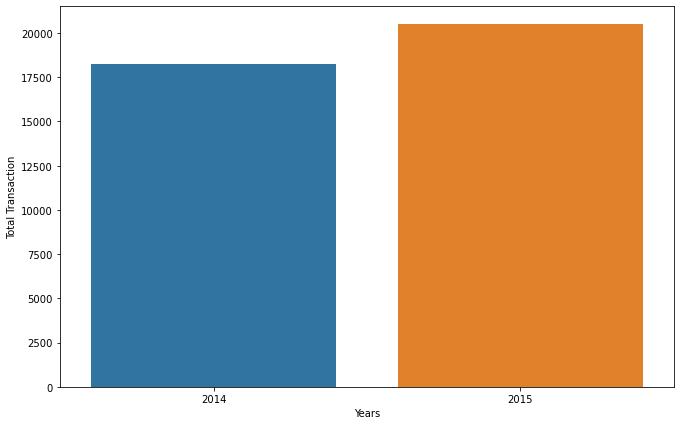

In [243]:
plt.figure(figsize=(11,7))
sns.countplot(df.Year)
plt.xlabel('Years')
plt.ylabel('Total Transaction')
plt.show()

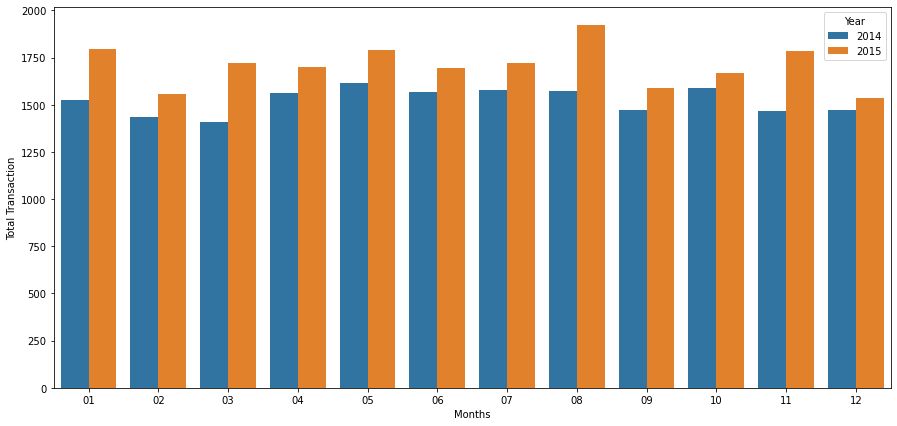

In [245]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.Month,hue=df.Year)
plt.xlabel('Months')
plt.ylabel('Total Transaction')
plt.show()

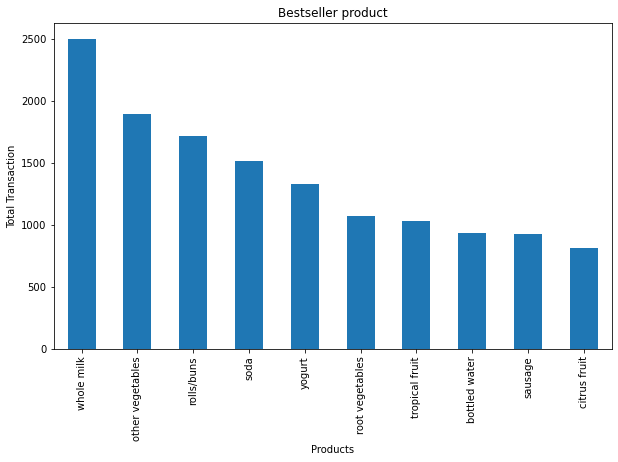

In [257]:
plt.title('Bestseller product')
df['itemDescription'].value_counts()[:10].plot(kind='bar',figsize=(10, 6))
plt.xlabel('Products')
plt.ylabel('Total Transaction')
#plt.xticks(rotation='vertical', size=8)
plt.show()

In [4]:
#Grouping by Costumers and date to create transactions
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].unique().reset_index()
transactions

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


In [5]:
#Separating the transactions as a list of lists and taking a look
trsct = list(list(i) for i in transactions.itemDescription.values)
trsct

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk', 'pastry'],
 

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [7]:
#one hot encoding and creating the encoded Dataframe
encoder = TransactionEncoder().fit(trsct)
onehot = encoder.transform(trsct)
dfonehot = pd.DataFrame(onehot, columns=encoder.columns_)
dfonehot.head(15)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Apriori

In [247]:
frequent_itemsets_apr = apriori(dfonehot, min_support=0.002, use_colnames=True)
frequent_itemsets_apr[:15]

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.008087,(baking powder)
3,0.033950,(beef)
4,0.021787,(berries)
5,0.016574,(beverages)
6,0.045312,(bottled beer)
7,0.060683,(bottled water)
8,0.002540,(brandy)
9,0.037626,(brown bread)


In [49]:
import timeit

In [71]:
# n = how many times to execute ‘statement’
# r = how many times to repeat the timer (default 5)

apr_time = %timeit -n 100 -r 10 apriori(dfonehot, min_support=0.002)
apr_time

2.4 s ± 49.9 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [219]:
#Compute association rules with a lift threshold of 1
rules_apr = association_rules(frequent_itemsets_apr, metric='lift', min_threshold=1)
rules_apr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(berries),0.122101,0.021787,0.002673,0.021894,1.004899,1.303311e-05,1.000109
1,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.303311e-05,1.000682
2,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,6.070623e-04,1.014464
3,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,6.070623e-04,1.010649
4,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,6.406768e-04,1.018191
5,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,6.406768e-04,1.014394
6,(brown bread),(pastry),0.037626,0.051728,0.002005,0.053286,1.030127,5.863558e-05,1.001646
7,(pastry),(brown bread),0.051728,0.037626,0.002005,0.038760,1.030127,5.863558e-05,1.001179
8,(rolls/buns),(chocolate),0.110005,0.023592,0.002807,0.025516,1.081592,2.117455e-04,1.001975
9,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,2.117455e-04,1.010188


In [223]:
apr_table = rules_apr.drop(['leverage', 'conviction'],axis=1)

In [221]:
resultsinAPR = pd.DataFrame(apr_table)

In [261]:
resultsinAPR.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
25,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150
17,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134
27,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991
1,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899
9,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592
23,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136
33,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975
35,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986
12,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615


## FP-Growth

In [8]:
frequent_itemsets_fp = fpgrowth(dfonehot, min_support=0.002, use_colnames=True)
frequent_itemsets_fp[:15]

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
5,0.018780,(salty snack)
6,0.046916,(canned beer)
7,0.015772,(misc. beverages)
8,0.013700,(hygiene articles)
9,0.097106,(soda)


In [117]:
# n = how many times to execute ‘statement’
# r = how many times to repeat the timer (default 5)

fp_time = %timeit -n 100 -r 10 fpgrowth(dfonehot, min_support=0.002)
fp_time

395 ms ± 27.8 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [9]:
#Compute association rules with a lift threshold of 1
rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1)

In [10]:
fp_table = rules_fp.drop(['leverage', 'conviction'],axis=1)

In [11]:
resultsinFP = pd.DataFrame(fp_table)

In [15]:
resultsinFP.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
35,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142
7,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150
15,(frozen meals),(other vegetables),0.016775,0.122101,0.002139,0.127490,1.044134
29,(meat),(other vegetables),0.016842,0.122101,0.002139,0.126984,1.039991
33,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899
16,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592
31,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136
2,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975
0,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986
9,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615


In [190]:
import numpy as np

In [182]:
fp_time1 = [0, 395]
apr_time1 = [0, 2400]

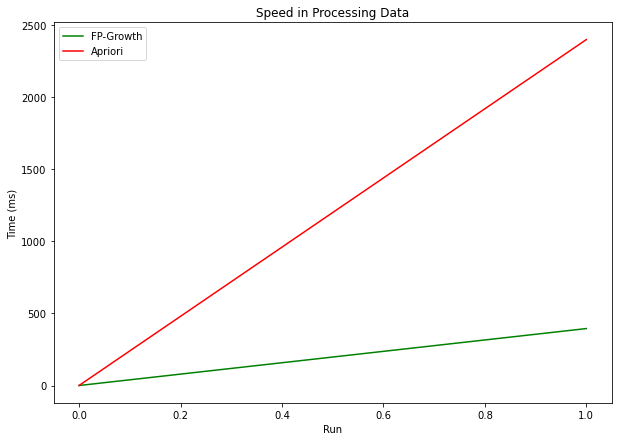

In [264]:
plt.figure(figsize=(10,7))
plt.xlabel("Run")
plt.ylabel("Time (ms)")

plt.title('Speed in Processing Data')
    plt.plot(fp_time1, color='orange', label="FP-Growth")
plt.plot(apr_time1, color='red', label="Apriori")
plt.legend()
plt.show()

In [184]:
fp_time2 = [0, 27.8]
apr_time2 = [0, 49.9]

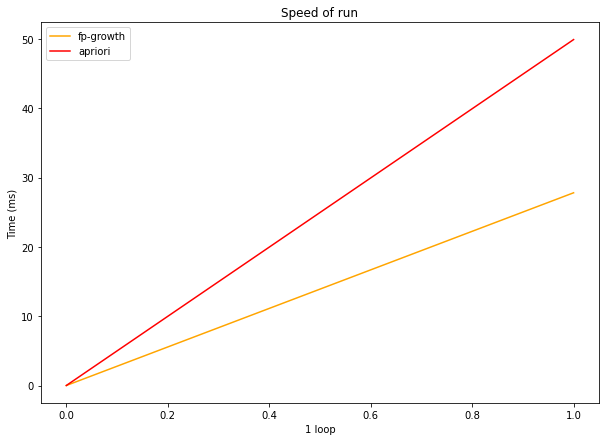

In [209]:
plt.figure(figsize=(10,7))
plt.xlabel("1 loop")
plt.ylabel("Time (ms)")
plt.title('Speed of run')
plt.plot(fp_time2, color='orange', label="fp-growth")

plt.plot(apr_time2, color='red', label="apriori")
plt.legend()
plt.show()